# Logistic Regression Implementation

In [1]:
# Importing Necessary Libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

## Data Preparation 

In [2]:
# Dummy Data Preparation

mean_01 = np.array([1, 0.5])                 # Mean Matrix
cov_01 = np.array([[1, 0.1], [0.1, 1.2]])    # Co-Variance Matrix

mean_02 = np.array([4, 5])
cov_02 = np.array([[1.21, 0.1], [0.1, 1.3]])


# Normal Distribution using multivariate_normal

dist_01 = np.random.multivariate_normal(mean_01, cov_01, 500)
dist_02 = np.random.multivariate_normal(mean_02, cov_02,500)

print(dist_01.shape, dist_01, dist_02.shape, dist_02, sep='\n\n')

(500, 2)

[[ 1.78795745e+00  1.60156254e+00]
 [ 1.59088540e+00  9.40853845e-01]
 [ 1.66302882e+00  3.90224384e-01]
 [ 6.02844285e-01  2.38963188e+00]
 [ 9.04788764e-01  6.62796741e-02]
 [ 8.67543793e-01 -5.80694324e-01]
 [ 1.56217016e+00  1.15802156e+00]
 [ 9.63803163e-01  5.80405573e-01]
 [ 1.67394313e+00  3.22195402e-01]
 [-9.35503384e-01 -1.81425485e+00]
 [ 1.80924913e+00  9.27562072e-01]
 [ 2.17567435e+00  9.91046539e-01]
 [ 1.05617792e+00  1.49532294e+00]
 [ 2.36715407e+00 -1.80160464e+00]
 [ 8.35451195e-02 -2.19867849e-01]
 [ 2.24990353e+00  1.44384804e+00]
 [-2.64178013e-01  2.80422458e-01]
 [-2.37822199e-01  1.16101366e+00]
 [ 1.73721960e+00  7.86074477e-01]
 [ 1.90252210e+00  1.32728932e+00]
 [ 1.78148489e+00  1.90698242e-02]
 [ 3.03001188e+00 -7.41198320e-02]
 [ 5.93749286e-01  9.19691349e-01]
 [ 2.13171431e+00 -8.48118097e-01]
 [ 1.21501081e+00  1.62937254e-01]
 [ 1.76678290e-02  3.09882770e-01]
 [ 1.02327055e+00  5.88204269e-01]
 [-5.58750292e-01  1.42152708e+00]
 [ 1.29658

## Plotting data

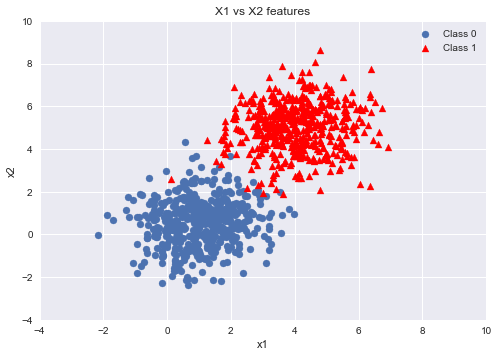

In [3]:
plt.figure(0)
plt.scatter(dist_01[:, 0], dist_01[:, 1], label='Class 0')
plt.scatter(dist_02[:, 0], dist_02[:, 1], color='r', marker='^', label='Class 1')
plt.xlim(-4, 10)
plt.ylim(-4, 10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('X1 vs X2 features')
plt.legend()
plt.show()

## Splitting Data in Training and Testing Data Set 

In [4]:
data = np.zeros((1000, 3))
print(data.shape)

(1000, 3)


In [5]:
data[:500, :2] = dist_01
data[500:, :2] = dist_02
data[500:, -1] = 1.0

In [6]:
np.random.shuffle(data)
print(data[:10])

[[ 5.01402432  6.54427516  1.        ]
 [ 4.79102403  5.18273528  1.        ]
 [ 0.74282086  0.82896838  0.        ]
 [ 1.36083559  0.05749836  0.        ]
 [ 4.02049791  3.65228632  1.        ]
 [ 3.92106984  6.43403387  1.        ]
 [ 5.28823512  5.07375437  1.        ]
 [ 3.67794676  5.88332211  1.        ]
 [ 4.56088034  3.5734187   1.        ]
 [ 0.94444628 -1.01703426  0.        ]]


In [7]:
# 80% of the date to be divided through split

split = int(0.8*data.shape[0])

In [8]:
# Now Dividing the data according the split value into 8 : 2 ratio
# 8 parts to be training data and 2 parts to be testing data

X_train = data[:split, :-1]
X_test = data[split:, :-1]

Y_train = data[:split, -1]
Y_test  = data[split:, -1]

print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(800, 2) (200, 2)
(800,) (200,)


## Logistic Regression Functions

In [9]:
# Hypothesis function : h(x) = m*x + c {Here, w*x + b}

def hypothesis(x, w, b):
    '''accepts input vector x, input weight vector w and bias(intercept) b'''
    hx = np.dot(x, w) + b
    return sigmoid(hx)

In [10]:
# Sigmoid function : g(z) = 1/(1+e^(-z))

def sigmoid(h):
    return 1.0/(1.0 + np.exp(-1.0*h))

In [11]:
# Error Function i.e., log likelihood function {maximising likelihood eqn}

def error(y, x, w, b):
    m = x.shape[0]
    err = 0.0
    for i in range(m):
        hx = hypothesis(x[i], w, b)
        err += y[i]*np.log2(hx)+(1-y[i])*np.log2(1-hx)
    return err/m       # Returning the mean absolute error

In [12]:
# Applying the update rule, Getting the gradient for w {weight} and b {bias}

def get_grad(x, w, b, y):
    grad_b = 0.0
    grad_w = np.zeros(w.shape)
    m = x.shape[0]
    for i in range(m):
        hx = hypothesis(x[i], w, b)
        grad_w += (y[i] - hx)*x[i]
        grad_b +=  (y[i]-hx)
    
    grad_w /= m
    grad_b /= m
    return [grad_w, grad_b]

In [13]:
# Gradient Descent Function

def gradient_descent(x, y, w, b, learning_rate=0.01):
    err = error(y, x, w, b)
    [grad_w, grad_b] = get_grad(x, w, b, y)
    w = w + learning_rate * grad_w
    b = b + learning_rate * grad_b
    return err, w, b

In [14]:
# Predict() function to get the confidence for a point to be in a class
# and predicting result i.e., the eqn of the Decision Boundary

def predict(x, w, b):
    
    confidence = hypothesis(x, w, b)
    if confidence < 0.5:
        return 0
    else:
        return 1

In [15]:
# get_acc() i.e., accuracy function to get the accuracy of the predictions

def get_acc(x_tst, y_tst, w, b):
    
    y_pred = []
    
    for i in range(y_tst.shape[0]):
        p = predict(x_tst[i], w, b)
        y_pred.append(p)
        
    y_pred = np.array(y_pred)
    
    return  float((y_pred==y_tst).sum())/y_tst.shape[0]

In [16]:
# For Building Model, giving some random values for W and b

loss = []
acc = []

W = 2*np.random.random((X_train.shape[1],))
b = 5*np.random.random()

In [17]:
# Training our Logistic Regression Model by train data
# and predicting the results for test data

for i in range(1000):
    l, W, b = gradient_descent(X_train, Y_train, W, b, learning_rate=0.1)
    acc.append(get_acc(X_test, Y_test, W, b))     # Getting the accuracy of the predictions to test data
    loss.append(l)

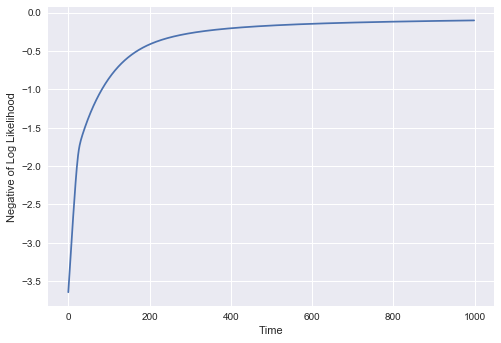

In [18]:
# Plotting the Loss 
# (For maximizing the probability, the loss should be gradually increasing)
# and the likelihood shold be minimizing as -ve value {greatest -ve}

plt.plot(loss)
plt.ylabel("Negative of Log Likelihood")
plt.xlabel("Time")
plt.show()

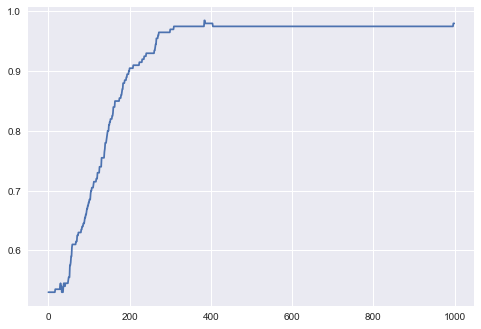

0.98


In [19]:
# Plotting the Accuracy of the prediction

plt.plot(acc)
plt.show()
print(acc[-1])

In [20]:
# Printing the parameters of the Decision Boundary i.e., W {weight or coffecients} and b {intercept}

print(W)         # Value of a, b in the equation ax1+bx2+c=0
print(b)         #Value of c (or intercept) in the equation ax1+bx2+c=0

[0.63655624 1.23932396]
-4.604108356893976


## Plotting the Hyperplane or the Decision Boundary 

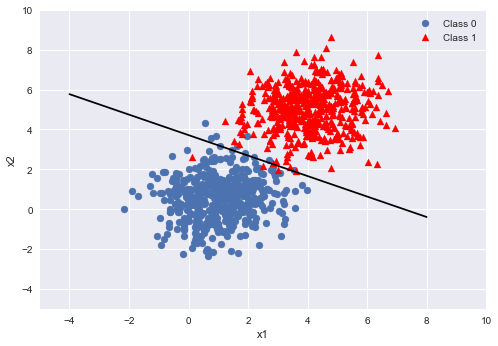

In [21]:
# Plotting the Decision Boundary for the Classes

plt.figure(0)

plt.scatter(dist_01[:, 0], dist_01[:, 1], label='Class 0')
plt.scatter(dist_02[:, 0], dist_02[:, 1], color='r', marker='^', label='Class 1')
plt.xlim(-5, 10)
plt.ylim(-5, 10)
plt.xlabel('x1')
plt.ylabel('x2')

x = np.linspace(-4, 8, 10)        # Taking some ranndom values
y = -(W[0]*x + b)/W[1]            # As from the eqn ax+by+c=0, y=-(ax+c)/b
plt.plot(x, y, color='k')

plt.legend()
plt.show()